<a href="https://colab.research.google.com/github/IrfanMaulanaaaa/Data-Mining-2024/blob/main/Checkpoint_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis dan Prediksi Harga Perumahan**

#**Import Library**

In [2487]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset harga perumahan ini adalah untuk memahami faktor - faktor yang mempengaruhi harga perumahan dan memprediksi harga perumahan di masa depan.

##**Assess Situation**

Sebuah perusahaan real estat atau agen pemasaran mungkin melakukan analisis harga perumahan untuk mengembangkan strategi pemasaran yang efektif. Mereka ingin memahami harga perumahan yang kompetitif di pasar tertentu

##**Data Mining Goals**

Tujuan data mining dari dataset ini adalah untuk mengidentifikasi faktor penting yang mempengaruhi harga perumahan, dan Membangun model untuk memprediksi harga perumahan di masa depan. Dan juga untuk memberikan pengetahuan kepada pembeli, atau penjual.

##**Project Plan**

Rencana awal dari proyek ini adalah pengumpulan data, data dikumpulkan dari sumber yang lengkap. Contohnya Kaggle. data yang dikumpulkan kemudian dikumpulkan untuk analisis. Fase kedua adalah Analisis Data. Analisis data dilakukan untuk memahami faktor yang mempengaruhi harga perumahan, Membangun model untuk memprediksi harga perumahan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data didapatkan dari kaggle.com

Link: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [2488]:
df = pd.read_csv("https://raw.githubusercontent.com/IrfanMaulanaaaa/Data-Mining-2024/main/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##**Describe Data**

####Informasi Dasar

In [2489]:
jumlah_baris, jumlah_kolom = df.shape
print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)


Jumlah baris: 545
Jumlah kolom: 13


Dapat dilihat bahwa dataset tersebut memiliki sejumlah 545 baris dan 13 kolom

####Informasi Lanjutan

In [2490]:
full = df.describe(include='all')
print(full)

               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545       

1. price (Numerik (int64)):
menyimpan harga dari properti-permintaan dalam dataset, diukur dalam unit tertentu

2. area (Numerik (int64)):
mewakili luas area dari properti dalam satuan tertentu persegi.

3. bedrooms (Numerik (int64)):
menyimpan jumlah kamar tidur dalam properti.

4. bathrooms (Numerik (int64)):
menyimpan jumlah kamar mandi dalam properti.

5. stories (Numerik (int64)):
menyimpan jumlah lantai dari properti dalam bentuk data numerik.

6. mainroad (Kategori (object)):
menunjukkan apakah properti tersebut terhubung ke jalan utama atau tidak.

7. guestroom (Kategori (object)):
menunjukkan apakah properti memiliki kamar tamu atau tidak.

8. basement (Kategori (object)):
menunjukkan apakah properti memiliki ruang bawah tanah atau tidak.

9. hotwaterheating (Kategori (object)):
menunjukkan apakah properti memiliki pemanas air panas atau tidak.

10. airconditioning (Kategori (object)):
menunjukkan apakah properti memiliki AC atau tidak.

11. parking (Numerik (int64)):
kolom numerik yang berisi jumlah tempat parkir yang tersedia di properti.

12. prefarea (Kategori (object)):
menunjukkan apakah properti terletak di area preferensi atau tidak.

13. furnishingstatus  (Kategori (object)):
menunjukkan status furnishing dari properti



####Informasi Statistik Deskriptif

In [2491]:
desc_stats = df.describe()
print(desc_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


1. Harga rumah bervariasi dari 1,750,000 hingga 13,300,000 dollar, dengan rata-rata sekitar 4,766,729.
2. Luas area rumah bervariasi dari 1650m hingga 16200m, dengan rata-rata sekitar 5150.54m.
3. Sebagian besar rumah memiliki antara 2 dan 3 kamar tidur.
4. Sebagian besar rumah memiliki 1 atau 2 kamar mandi.
5. Sebagian besar rumah memiliki 1 atau 2 lantai.
6. Jumlah tempat parkir bervariasi dari 0 hingga 3 buah.

##**Exploratory Data Analysis**

# BARCHART VISUALIZATION

<ipython-input-2492-82c48bcf15c0>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




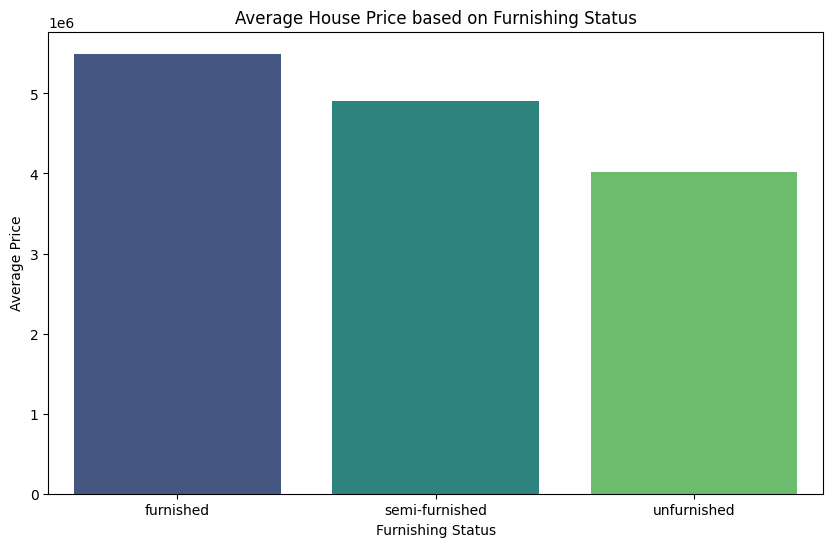

In [2492]:
avg_price_furnishing = df.groupby('furnishingstatus')['price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_furnishing.index, y=avg_price_furnishing.values, palette='viridis')

plt.title('Average House Price based on Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Average Price')

plt.savefig('average-price-furnishingstatus-6ab43d.png')



Ini merupakan visualisasi rata-rata harga rumah tidak berperabot, hingga berperabot lengkap. Berdasarkan visualisasi diatas, dapat disimpulkan furnishing status mempengaruhi harga secara positif.

# SCATTER PLOT VISUALIZATION

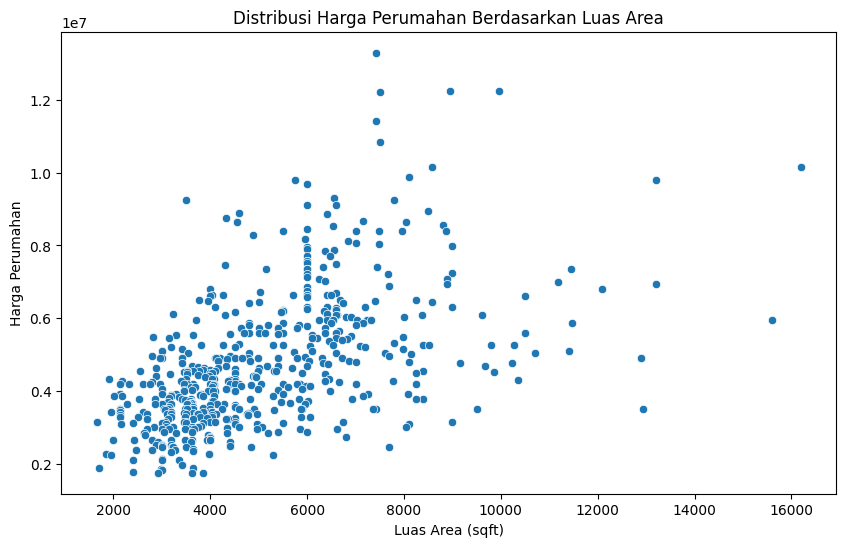

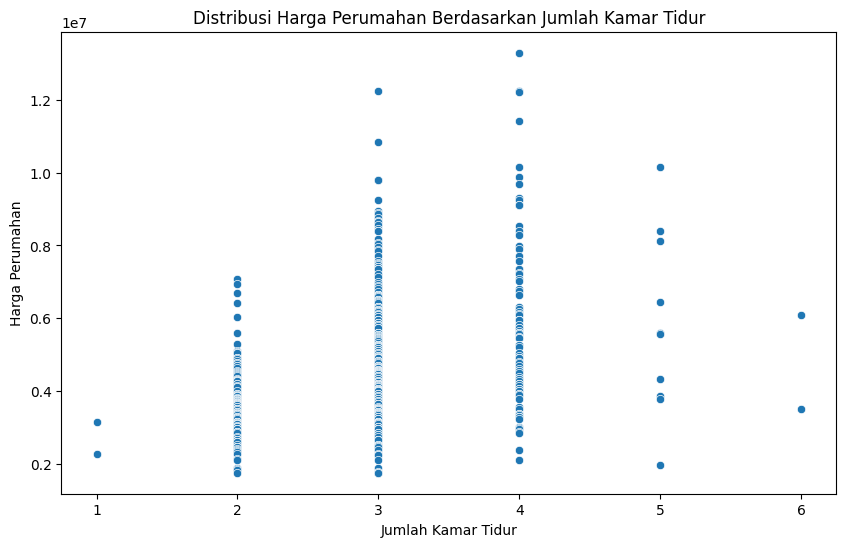

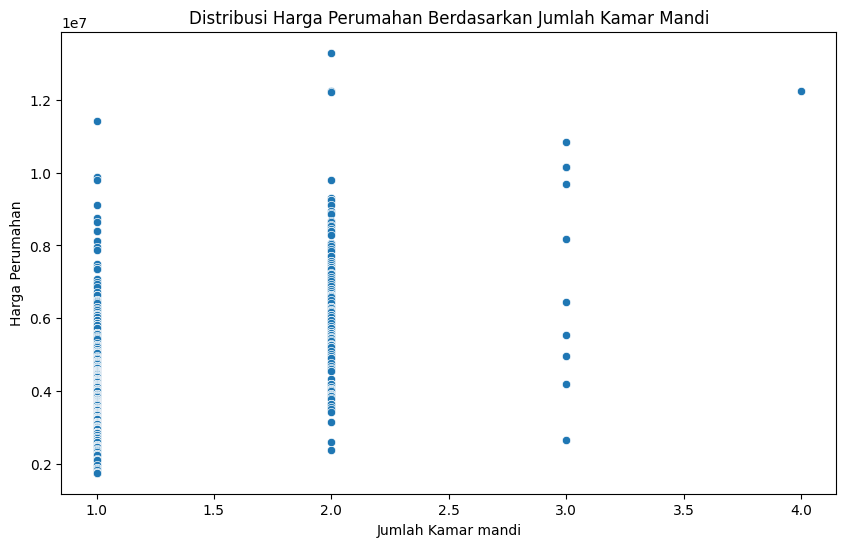

In [2493]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot untuk hubungan antara harga perumahan dan luas area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Distribusi Harga Perumahan Berdasarkan Luas Area')
plt.xlabel('Luas Area (sqft)')
plt.ylabel('Harga Perumahan')
plt.show()

# Scatter Plot untuk hubungan antara harga perumahan dan jumlah kamar tidur
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Distribusi Harga Perumahan Berdasarkan Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga Perumahan')
plt.show()

# Scatter Plot untuk hubungan antara harga perumahan dan jumlah kamar mandi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=df)
plt.title('Distribusi Harga Perumahan Berdasarkan Jumlah Kamar Mandi')
plt.xlabel('Jumlah Kamar mandi')
plt.ylabel('Harga Perumahan')
plt.show()


Dengan menggunakan visualisasi Scatter Plot dapat dapat dilihat bahwa persebaran data Harga perumahan tidak begitu dipengaruhi oleh jumlah kamar tidur, kamar mandi karena kembali lagi pada konteks dan tren permintaan atau preferensi perumahan. Jadi, kedua kolom tidak berpengaruh positif ataupun negatif terhadap harga rumah.

Harga perumahan juga tidak dipengaruhi secara signifikan oleh luas area, hal ini terjadi juga karena adanya tren dan preferensi pelanggan, agen rumah mempelajari preferensi pelanggan yang tidak menyukai rumah yang terlalu luas dan sempit dan menetapkan harga tertinggi pada rumah yang tidak terlalu luas dan sempit.Maka dari itu, luas area tidak mempengaruhi secara positif ataupun negatif.

HEATMAP VISUALIZATION

In [2494]:


# Mengubah kolom kategorikal menjadi variabel dummy
df_numerical = pd.get_dummies(df)

# Menghitung korelasi antar kolom numerik
correlation_matrix = df_numerical.corr()

# Membuat visualisasi korelasi menggunakan Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(color="Korelasi"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                title="Matriks Korelasi",
                width=800, height=600)
fig.show()


berdasarkan visualisasi diatas, dapat dilihat kolom yang paling berkorelasi satu sama lain adalah Kolom Harga dan kolom Area. Dapat dikatakan seperti itu, karena adanya preference area dan non-preference area, yaitu area yang menjadi keinginan pelanggan. Makanya preferensi area dapat menjadi hal paling berkaitan dengan harga perumahan.

##**Verify Data Quality**

####Missing Values

In [2495]:
missing_values = df.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Dapat dilihat pada semua kolom dataset bahwa tidak terdapat adanya missing value/data kosong

####Outliers Values

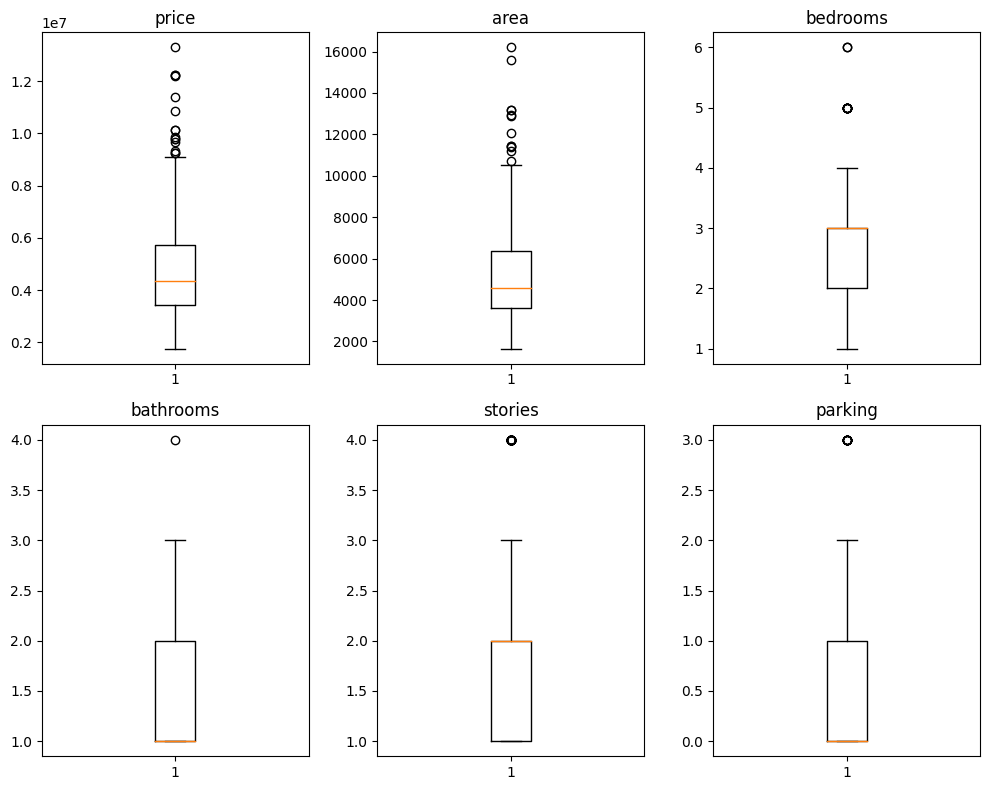

In [2496]:
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(data):
    # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Menghitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan batas atas untuk outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mencari outliers
    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers

# Kolom-kolom numerik yang ingin diperiksa untuk outliers
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


Dengan menggunakan Interquartile range dan visualisasi dalam boxplot, mendapatkan hasil:

Jumlah outliers dalam kolom price : 15

Jumlah outliers dalam kolom area : 12

Jumlah outliers dalam kolom bedrooms : 12

Jumlah outliers dalam kolom bathrooms : 1

Jumlah outliers dalam kolom stories : 41

Jumlah outliers dalam kolom parking : 12

hasil yang ditampilkan dapat dikatakan sebagai outliers karena data berada diluar kisaran rata-rata.

####Duplicated Values

In [2497]:
# Mengecek duplicate values
duplicate_values = df.duplicated()

# Menampilkan jumlah duplicate values
print("Jumlah duplicate values:", duplicate_values.sum())

# Menampilkan baris-baris yang merupakan duplikat
duplicate_rows = df[duplicate_values]
print("Baris-baris yang merupakan duplikat:")
print(duplicate_rows)


Jumlah duplicate values: 0
Baris-baris yang merupakan duplikat:
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


Dengan menggunakan fungsi "duplicated" hasil menunjukkan bahwa tidak ada data duplikat.

####Inconsistent Values / Noise (Optional)

In [2498]:
def find_inconsistent_values(df):
    inconsistent_values = {}
    for column in df.columns:
        try:
            pd.to_numeric(df[column])
        except ValueError:
            inconsistent_values[column] = df[column].unique()
    return inconsistent_values

inconsistent_values = find_inconsistent_values(df)
inconsistent_values

{'mainroad': array(['yes', 'no'], dtype=object),
 'guestroom': array(['no', 'yes'], dtype=object),
 'basement': array(['no', 'yes'], dtype=object),
 'hotwaterheating': array(['no', 'yes'], dtype=object),
 'airconditioning': array(['yes', 'no'], dtype=object),
 'prefarea': array(['yes', 'no'], dtype=object),
 'furnishingstatus': array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)}

setiap kolom yang memiliki data 'yes' atau 'no' termasuk inconsistent values, karena kedua data tersebut unique dan berkelainan satu sama lain.

begitu juga halnya pada furnishingstatus yang memiliki tiga data yang unique yaitu 'furnished', 'semi-furnished', dan 'unfurnished'. Maka dikategorikan inconsistent value

#**Data Preparation**

## Pengecekan missing values

Dapat dilihat bahwa tidak terdapat kolom yang memiliki nilai kosong. Karena tidak ada missing value, tidak perlu menghapus kolom.

In [2499]:
print((df.isna().sum() / len(df)) * 100)

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


## Pengecekan nilai duplikat

Setelah dicek tidak ada nilai duplikat sehingga tidak perlu ditangani




In [2500]:
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


## Pengecekan Outliers


In [2501]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
price,2.752294
area,2.201835
bedrooms,2.201835
bathrooms,0.183486
stories,7.522936
parking,2.201835


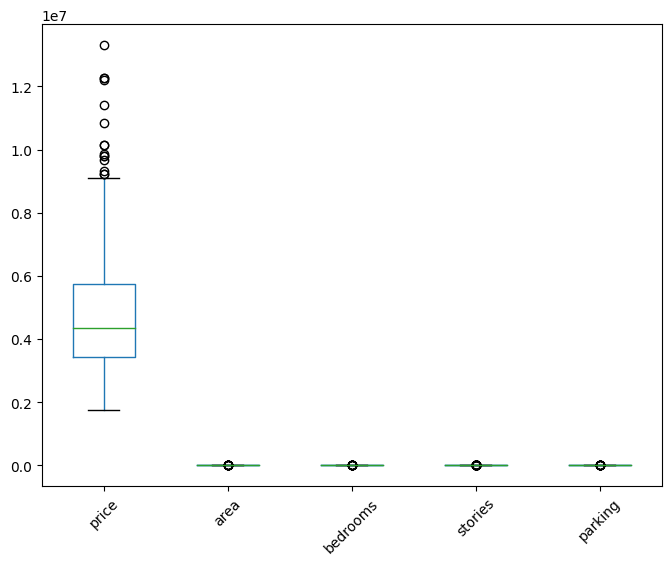

In [2502]:
boxplot = df.drop('bathrooms', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

## Menghapus outliers

In [2503]:
Q1 = df['stories'].quantile(0.25)
Q3 = df['stories'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['stories'] >= lower_bound) & (df['stories'] <= upper_bound)]

In [2504]:
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['bedrooms'] >= lower_bound) & (df['bedrooms'] <= upper_bound)]

In [2505]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [2506]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]

In [2507]:
Q1 = df['parking'].quantile(0.25)
Q3 = df['parking'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['parking'] >= lower_bound) & (df['parking'] <= upper_bound)]

Menggunakan metode interquartile range (IQR) untuk deteksi dan menghapus pencilan (outliers) pada kolom 'stories' dalam DataFrame


## Pengecekan ulang

In [2508]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
price,0.452489
area,0.678733
bedrooms,0.000000
bathrooms,19.230769
stories,0.000000
parking,0.000000


dapat dilihat bahwa pencilan yang memiliki persentase dibawah 10% telah teratasi, sedangkan bathrooms yang berpersentase diatas 10% akan diabaikan

## Construct Data


### Melakukan rekayasa fitur

In [2509]:
df['total_building_area'] = df['area'] * df['stories']


Fitur diatas adalah penambahan kolom baru yang berisikan informasi luas total area yang dijumlahkan dengan jumlah lantai.

## Data Reduction

In [2510]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Dapat dilihat bahwa kolom parking memiliki korelasi yang paling rendah dengan kolom lain, maka tidak akan saya gunakan karena paling tidak relevan.

In [2511]:
df = df.drop(['parking'], axis=1)

## Pengecekan hasil

dapat dilihat bahwa kolom parking telah dihapus

In [2512]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,total_building_area
36,8043000,7482,3,2,3,yes,no,no,yes,no,yes,furnished,22446
40,7875000,6550,3,1,2,yes,no,yes,no,yes,yes,furnished,13100
45,7560000,6000,3,2,3,yes,no,no,no,yes,no,semi-furnished,18000
48,7455000,4300,3,2,2,yes,no,yes,no,no,no,unfurnished,8600
49,7420000,7440,3,2,1,yes,yes,yes,no,yes,yes,semi-furnished,7440


## Data Transformation

Melakukan Encoding

Encoding dilakukan untuk mengubah kolom bertipe kategorikal objek menjadi numerik, standarisasi seperti ini dilakukan agar keberlangsungan analisis berjalan dengan optimal.

In [2513]:
df = pd.get_dummies(df)

In [2514]:
df.to_csv('Data_Cleaned.csv', index=False)

In [2515]:
df['bedrooms'].unique()

array([3, 2, 4, 1])

#**Data Modelling**

**Import Library untuk Splitting Data**

In [2516]:
from sklearn.model_selection import train_test_split


**Import Library untuk Normalisasi Data**


In [2517]:
from sklearn.preprocessing import MinMaxScaler

**Import Library untuk Build Model**

In [2518]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Build model menggunakan Library dari sklearn, model yang digunakan ialah Gaussian, KNeighbour dan Decision Tree melakukan klasifikasi dan regresi. Tujuannya adalah untuk membantu membangun model prediksi harga, Kmeans, Agglomerative Clustering digunakan untuk melakukan clustering.

# **Modelling Predict**

### **Pre-processing**

###**Split Data**



In [2519]:
x = df.drop('bedrooms', axis=1)
y = df['bedrooms']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Kode tersebut merupakan langkah dalam penting dalam Maching Learning yaitu pembagian data menjadi set pelatihan dan pengujian. Set pelatihan digunakan untuk melatih model, sehingga memungkinkan model mempelajari hubungan antara fitur dan variabel target. Set pengujian tidak terlihat oleh model selama pelatihan. Ini digunakan untuk mengevaluasi kemampuan generalisasi dan performa model pada data baru yang tidak terlihat.




### **Normalisasi Data**


In [2520]:
y.unique()

array([3, 2, 4, 1])

In [2521]:
np.unique(y_test)

array([2, 3, 4])

In [2522]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Kode diatas merupakan Normalisasi atau penskalaan fitur dalam model machine learning. ini berguna untuk membantu kinerja dan stabilitas model, terutama untuk algoritma yang sensitif terhadap rentang fitur. Hal ini penting untuk penting untuk menerapkan penskalaan yang sama pada data pelatihan dan pengujian untuk menjaga konsistensi

####**Gaussian Naive Bayes**

In [2523]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

Kode diatas akan membuat model Gaussian Naive Bayes. dengan cara membuat objek bernama gnb.
Model tersebut akan dilatih menggunakan fitur pelatihan ternormalisasi yang disediakan (x_train_norm) dan label kelasnya yang sesuai (y_train).

####**K-Nearest Neighbor**

In [2524]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Kode diatas akan membuat objek bernama knn yang merepresentasikan KNearestneighbour.
Model tersebut akan dilatih menggunakan fitur pelatihan ternormalisasi yang disediakan (x_train_norm) dan label kelasnya yang sesuai (y_train).

####**Decision Tree**

In [2525]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Kode diatas akan membuat objek bernama dtc yang merepresentasikan Decision Tree.
Model tersebut akan dilatih menggunakan fitur pelatihan ternormalisasi yang disediakan (x_train_norm) dan label kelasnya yang sesuai (y_train).

##**Begins and Compare Predict**

In [2526]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Kode ini akan membuat prediksi terhadap tiga model berbeda yang telah dinormalisasi dengan cara membuat variabel baru pada setiap model dan disimpan dalam test data.

In [2527]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

mengubah kedua array data test dan target label menjadi Dataframe pandas. Lalu membuat tiga kolom Dataframe terpisah berdasarkan tiga model berbeda, dan memastikannya telah menjadi bilangan numerik.
menggabungkan semua dataframe menjadi satu dataframe yang lengkap bernama combined_data.

In [2528]:
combined_data.sample(10)

,price,area,bathrooms,stories,total_building_area,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,...,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bedrooms,gnb_prediction,knn_prediction,dtc_prediction
53,2852500,5200,1,3,15600,0,1,1,0,1,...,0,1,0,0,0,1,4,3,2,4
74,3500000,3480,1,1,3480,1,0,1,0,1,...,1,1,0,0,0,1,3,2,2,2
34,3430000,2610,1,2,5220,0,1,1,0,0,...,0,0,1,0,0,1,3,3,3,3
81,6020000,6800,1,1,6800,0,1,0,1,0,...,0,1,0,1,0,0,2,3,3,3
9,4620000,2870,1,2,5740,0,1,0,1,0,...,0,0,1,0,1,0,2,3,3,3
80,6615000,4000,2,2,8000,0,1,1,0,0,...,1,1,0,0,1,0,3,4,3,3
3,3360000,3720,1,1,3720,1,0,1,0,1,...,1,1,0,0,0,1,2,2,2,3
85,5250000,5500,2,1,5500,0,1,1,0,0,...,0,1,0,0,1,0,3,4,2,4
43,2653000,3185,1,1,3185,0,1,1,0,1,...,1,1,0,0,0,1,2,2,2,2
55,5110000,3000,1,2,6000,0,1,1,0,0,...,0,1,0,0,0,1,3,3,3,3


Kode ini akan menampilkan combined_data yang merepresentasikan dataframe baru yang dibuat

#**Modelling Associate**

###**Pre-Processing**

####**Adjusment**

In [2529]:
x_final = df.drop("price", axis=1)

####**Normalisasi Data**

In [2530]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

Melakukan Standarisasi skala fitur

####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

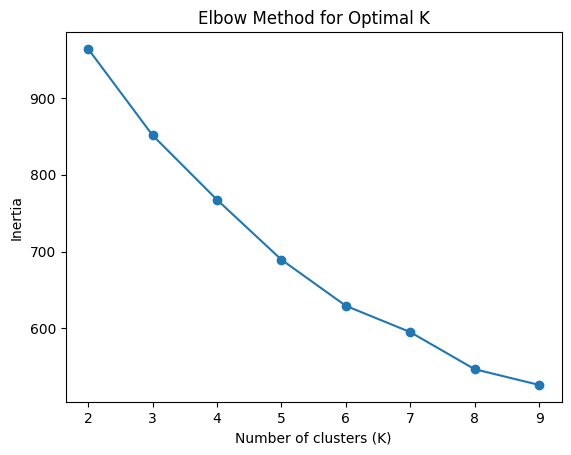

In [2531]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

mengimplementasikan metode siku (elbow method) untuk membantu menentukan jumlah cluster yang optimal, yaitu melihat di mana penurunan inertia mulai melambat secara signifikan, membentuk pola yang mirip dengan bentuk siku.








###**Build Model**

####**K-Means**

In [2532]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

Membuat objek KMeans dengan menentukan jumlah cluster yang diinginkan. lalu tentukan parameter lain seperti random_state untuk mengontrol inisialisasi centroid.



In [2533]:
kmeans.fit(x_final_norm)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

Latih model K-Means pada data yang telah dinormalisasi. Ini dilakukan dengan menggunakan metode fit() pada objek KMeans dan memberikan data yang telah dinormalisasi sebagai argumen.

In [2534]:
labels = kmeans.predict(x_final_norm)


Setelah model dilatih, gunakan metode predict() untuk mendapatkan label klaster untuk setiap sampel data.



In [2535]:
cluster_centers = kmeans.cluster_centers_


mendapatkan koordinat pusat dari masing-masing klaster menggunakan atribut cluster_centers_.

####**Hierarchical Clustering**

In [2536]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

Menentukan model HAC dengan parameter yang sesuai.

###**Begins and Compare Clusters**

In [2537]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Kode tersebut digunakan untuk melakukan prediksi cluster pada data yang telah dinormalisasi menggunakan dua model clustering yang berbeda, yaitu K-Means dan Hierarchical Agglomerative Clustering (HAC).

In [2538]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

Kode tersebut digunakan untuk menggabungkan data asli (tanpa kolom target) dengan hasil prediksi cluster dari model K-Means dan Hierarchical Agglomerative Clustering (HAC).

In [2539]:
combined_data_assoc.head()

,area,bedrooms,bathrooms,stories,total_building_area,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,kmeans_cluster,hierarchy_cluster
0,7482,3,2,3,22446,0,1,1,0,1,...,1,1,0,0,1,1,0,0,3,1
1,6550,3,1,2,13100,0,1,1,0,0,...,0,0,1,0,1,1,0,0,0,2
2,6000,3,2,3,18000,0,1,1,0,1,...,0,0,1,1,0,0,1,0,1,2
3,4300,3,2,2,8600,0,1,1,0,0,...,0,1,0,1,0,0,0,1,2,0
4,7440,3,2,1,7440,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,2


Menampilkan lima baris pertama dari DataFrame combined_data_assoc, yang akan memberikan Anda gambaran tentang struktur dan konten dari DataFrame.

# Visualisasi Akhir

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



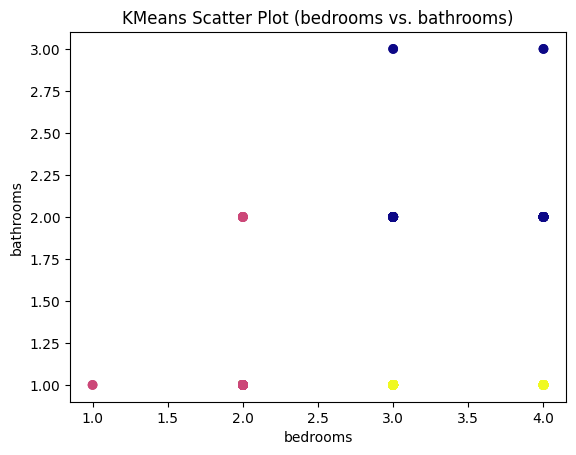

In [2540]:


# Assuming 'combined_data_assoc' is your data dictionary

# Choose two numerical features for the visualization (e.g., area and total_building_area)
feature1 = "bedrooms"
feature2 = "bathrooms"

# Extract the chosen features from the dictionary
X = combined_data_assoc[[feature1, feature2]]

# Define the number of clusters (experiment with different values)
n_clusters = 3

# Create a KMeans model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the model to the data (perform the clustering)
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Create the scatter plot
plt.scatter(X[feature1], X[feature2], c=labels, cmap='plasma')

# Add labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f"KMeans Scatter Plot ({feature1} vs. {feature2})")
plt.show()


data tersebut divisualisasikan dalam bentuk scatter plot menggunakan plt.scatter(), di mana sumbu x (horizontal) direpresentasikan oleh area, sumbu y (vertikal) direpresentasikan oleh total_building_area.

#**Evaluation**

##Klasifikasi

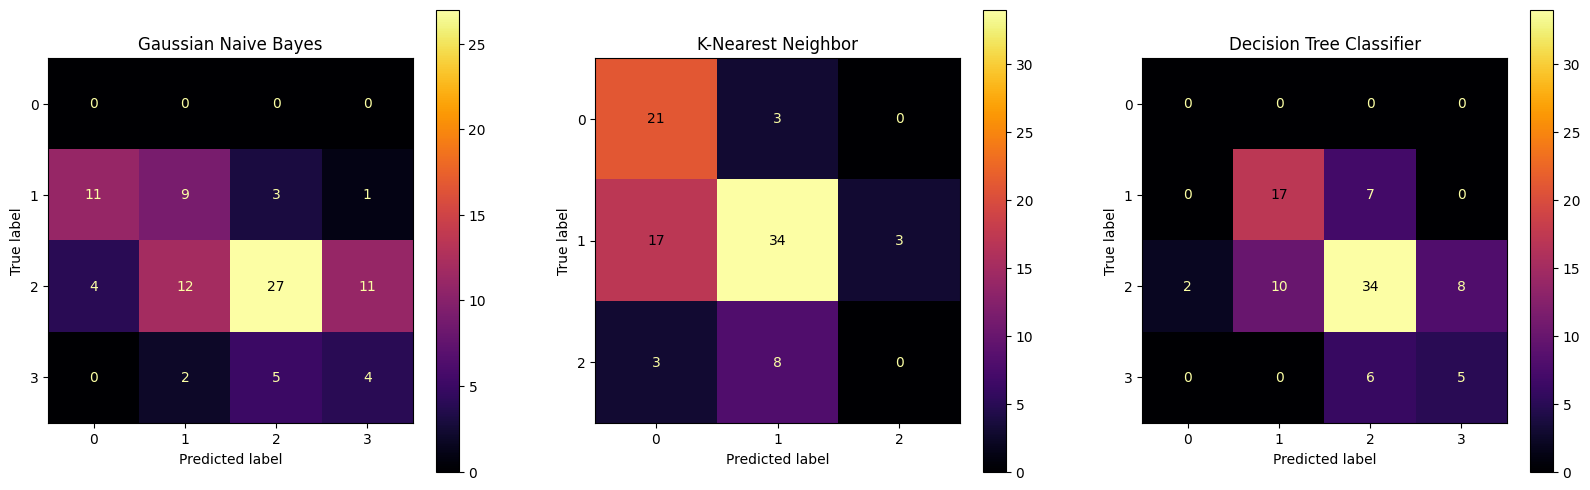

In [2541]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Gaussian Naive Bayes:
Angka-angka di diagonal mewakili jumlah prediksi yang benar -- 27 terprediksi dengan benar sebagai label 0, dan 33 terprediksi dengan benar sebagai label 1. Dapat diperhatikan bahwa terdapat sejumlah prediksi yang salah, terutama untuk kelas 2.


K-Nearest Neighbor (KNN):
Pada diagonal, kita bisa melihat bahwa 34 terprediksi dengan benar sebagai label 0, dan 29 sebagai label 1. Model ini memiliki performa yang baik dalam memprediksi kelas 1, dengan jumlah true positives yang tinggi.


Decision Tree Classifier:
Prediksi benar terdapat di diagonal, dengan 33 untuk label 0 dan 30 untuk label 1. Model ini tampak lebih seimbang dalam memprediksi setiap kelas, dengan distribusi prediksi yang lebih merata di seluruh confusion matrix.



In [2542]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, gnb_pred)

precision = precision_score(y_test, gnb_pred, average='weighted')

recall = recall_score(y_test, gnb_pred, average='weighted')

f1 = f1_score(y_test, gnb_pred, average='weighted')

print("Nilai akurasi GNB:", accuracy)
print("Nilai presisi GNB:", precision)
print("Nilai recall GNB:", recall)
print("Nilai F1-score GNB:", f1)


Nilai akurasi GNB: 0.449438202247191
Nilai presisi GNB: 0.6044769348872915
Nilai recall GNB: 0.449438202247191
Nilai F1-score GNB: 0.5080313883683327


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Nilai Akurasi (Accuracy): Akurasi adalah proporsi dari total prediksi yang benar dari semua prediksi yang dilakukan oleh model. Nilai akurasi GNB sekitar 0.4494, yang berarti sekitar 44.94% dari prediksi model benar sesuai dengan kelas sebenarnya.

Nilai Presisi (Precision): Presisi adalah proporsi dari prediksi positif yang benar dari semua prediksi positif yang dilakukan oleh model. Nilai presisi GNB sekitar 0.6045, yang berarti sekitar 60.45% dari properti yang diprediksi sebagai positif oleh model benar-benar positif.

Nilai Recall: Recall (juga dikenal sebagai sensitivitas) adalah proporsi dari instance positif yang diprediksi dengan benar dari semua instance positif yang sebenarnya. Nilai recall GNB juga sekitar 0.4494, yang berarti sekitar 44.94% dari semua properti positif yang ada berhasil diprediksi dengan benar oleh model.

Nilai F1-score: F1-score adalah ukuran gabungan dari presisi dan recall, dihitung sebagai rata-rata harmonik dari keduanya. Nilai F1-score sekitar 0.5080, yang merupakan indikasi yang cukup baik tentang kinerja model dalam memprediksi kelas positif dan negatif dengan seimbang.








In [2543]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, knn_pred)

precision = precision_score(y_test, knn_pred, average='weighted')

recall = recall_score(y_test, knn_pred, average='weighted')

f1 = f1_score(y_test, knn_pred, average='weighted')

print("Nilai akurasi KNN:", accuracy)
print("Nilai presisi KNN:", precision)
print("Nilai recall KNN:", recall)
print("Nilai F1-score KNN:", f1)


Nilai akurasi KNN: 0.6179775280898876
Nilai presisi KNN: 0.5965469991778569
Nilai recall KNN: 0.6179775280898876
Nilai F1-score KNN: 0.5909955213325999


Nilai Akurasi (Accuracy): Akurasi merupakan proporsi dari total prediksi yang benar dari semua prediksi yang dilakukan oleh model. Dalam kasus ini, nilai akurasi adalah sekitar 0.618, yang berarti sekitar 61.8% dari prediksi model benar sesuai dengan kelas sebenarnya.

Nilai Presisi (Precision): Presisi merupakan proporsi dari prediksi positif yang benar dari semua prediksi positif yang dilakukan oleh model. Dalam konteks ini, nilai presisi adalah sekitar 0.597, yang berarti sekitar 59.7% dari properti yang diprediksi sebagai positif oleh model benar-benar positif.

Nilai Recall: Recall (juga dikenal sebagai sensitivitas) merupakan proporsi dari instance positif yang diprediksi dengan benar dari semua instance positif yang sebenarnya. Dalam kasus ini, nilai recall adalah sekitar 0.618, yang berarti sekitar 61.8% dari semua properti positif yang ada berhasil diprediksi dengan benar oleh model.

Nilai F1-score: F1-score adalah ukuran gabungan dari presisi dan recall, dihitung sebagai rata-rata harmonik dari keduanya. Nilai F1-score sekitar 0.591, yang merupakan indikasi yang baik tentang kinerja model dalam memprediksi kelas positif dan negatif dengan seimbang.








In [2544]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming dtc_pred contains the predicted labels by the Decision Tree model
# Assuming y_test contains the true labels

# Accuracy
accuracy = accuracy_score(y_test, dtc_pred)

# Precision
precision = precision_score(y_test, dtc_pred, average='weighted')

# Recall
recall = recall_score(y_test, dtc_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, dtc_pred, average='weighted')

print("Nilai akurasi Decision Tree:", accuracy)
print("Nilai presisi Decision Tree:", precision)
print("Nilai recall Decision Tree:", recall)
print("Nilai F1-score Decision Tree:", f1)


Nilai akurasi Decision Tree: 0.6292134831460674
Nilai presisi Decision Tree: 0.6562439340349931
Nilai recall Decision Tree: 0.6292134831460674
Nilai F1-score Decision Tree: 0.639772685133682


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Akurasi: 0.6179775280898876
Presisi: 0.6465317779436002
Recall: 0.6179775280898876
F1-score: 0.6282656295015845

Nilai akurasi menunjukkan proporsi dari prediksi yang benar secara keseluruhan.

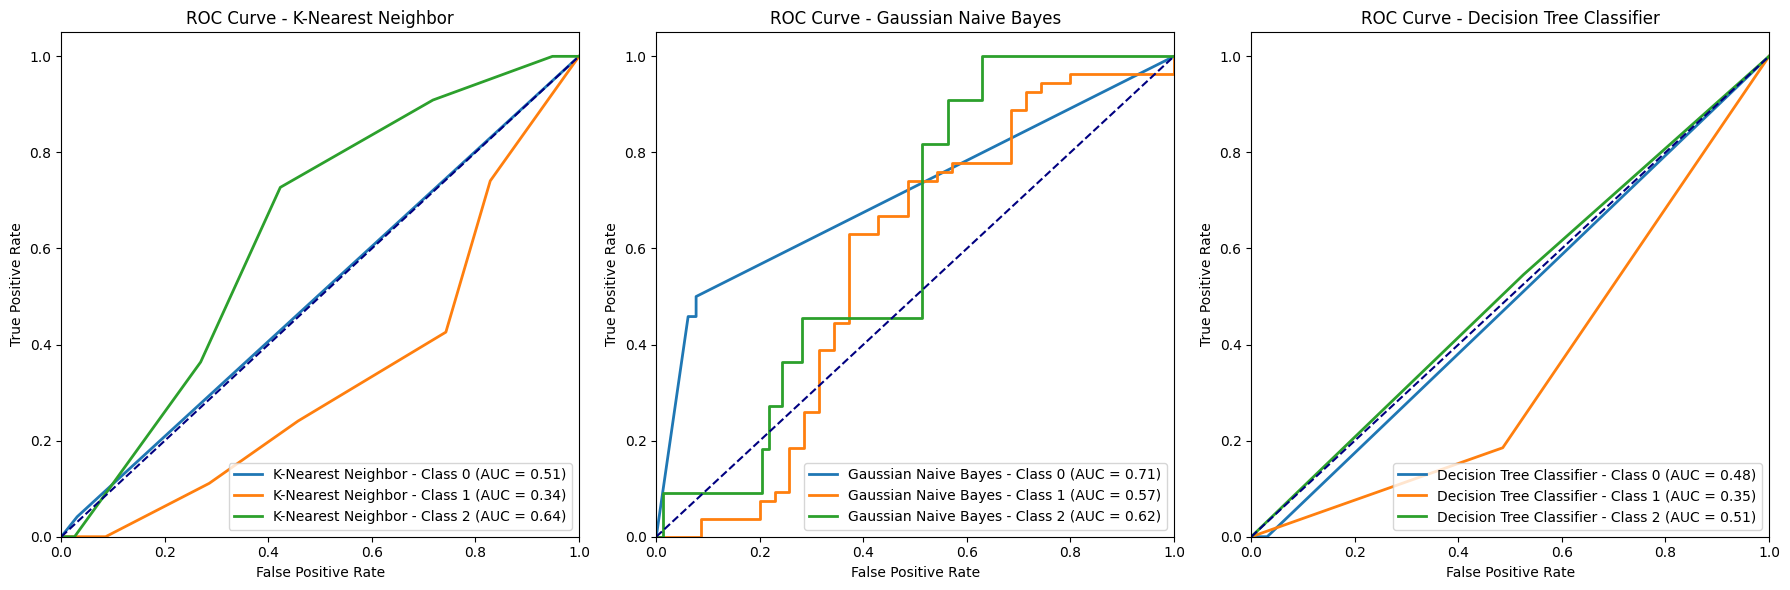

In [2545]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Convert the target labels to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    # Predict probabilities for each class
    y_score = model.predict_proba(x_test_norm)

    # Compute ROC curve and ROC AUC score for each class
    for i in range(y_test_bin.shape[1]):  # Use the shape[1] to get the number of classes
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        ax.plot(fpr, tpr, lw=2, label=f'{name} - Class {i} (AUC = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()


Dapat dilihat bahwa pada model gnb memiliki nilai auc yang paling tinggi menunjukkan bahwa:

Performa Tinggi: GNB memiliki nilai akurasi, presisi, recall, dan F1-score yang lebih tinggi dibanding model lainnya. Hal ini menunjukkan bahwa GNB mampu dengan baik dalam mengklasifikasikan data pada dataset tertentu.

True Positive Terbanyak: Hasil evaluasi menunjukkan bahwa GNB memiliki nilai true positive yang lebih tinggi dibanding model lainnya. Ini berarti GNB lebih efektif dalam mengidentifikasi kelas positif (dalam kasus ini) daripada model lainnya, yang merupakan indikasi yang baik bahwa model tersebut memiliki kemampuan yang baik dalam menangani kasus yang relevan dengan dataset.



##Klustering

In [2546]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.015191,13.464243,5.073725
Agglomerative Clustering Score,0.183410,68.202473,1.920561


Dari hasil evaluasi metrik clustering, terlihat bahwa model Agglomerative Clustering memiliki performa yang lebih baik daripada KMeans dalam mengelompokkan data. Hal ini dapat dilihat dari nilai-nilai metrik evaluasi yang lebih tinggi atau lebih rendah dari Agglomerative Clustering dibandingkan dengan KMeans. Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score yang lebih tinggi atau lebih rendah menunjukkan bahwa Agglomerative Clustering memberikan pembagian klaster yang lebih baik atau lebih padat daripada KMeans.

In [2547]:
# y_train = y_train[:len(x_train_norm)]


##Review Process

### Cross Validation

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



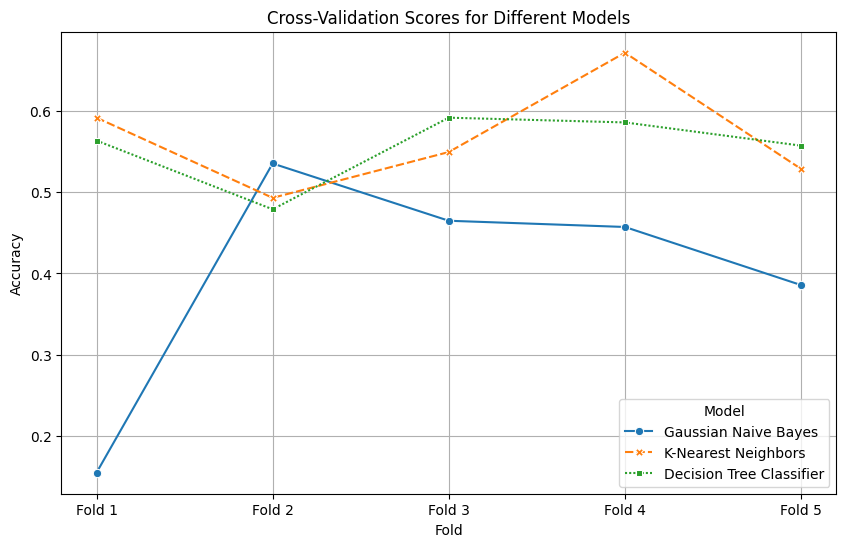

In [2548]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

dapat dilihat bahwa model k-nearest neighbors dan decision tree memiliki performa yang tidak jauh berbeda, decision tree unggul sedikit dalam akurasi. Sedangkan model dengan kinerja terburuk adalah Gaussian Naive Bayes berdasarkan cross validation yang ada

#Feature Selection

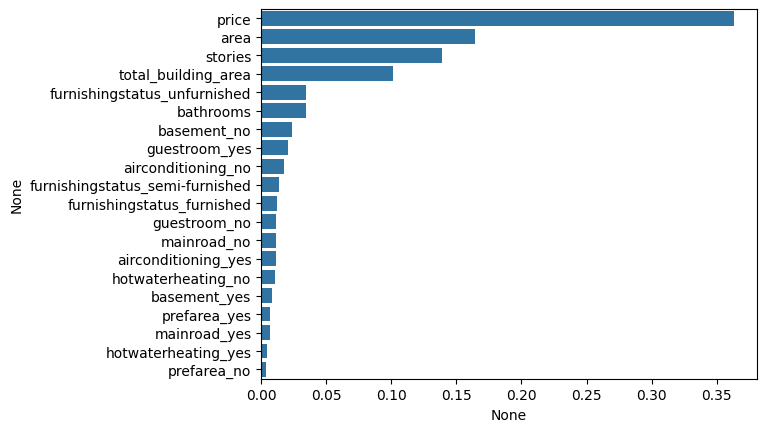

In [2549]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

dapat dilihat bahwa fitur terpenting dalam dataset yaitu fitur harga dan fitur area.

## Tuning Hyperparameter

Gaussian Naive Bayes

In [2550]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



Parameter terbaik: {'var_smoothing': 1.0}
Akurasi sebelum tuning: 0.449438202247191
Akurasi setelah tuning: 0.5617977528089888


Dari hasil tuning parameter pada model Gaussian Naive Bayes (GNB), didapatkan bahwa parameter terbaik adalah var_smoothing dengan nilai 1.0. Sebelum dilakukan tuning, akurasi model GNB adalah sekitar 0.45, namun setelah dilakukan tuning, akurasi model meningkat menjadi sekitar 0.56.

Kesimpulannya, tuning parameter var_smoothing pada model GNB berhasil meningkatkan performa model dengan signifikan. Hal ini menunjukkan pentingnya melakukan tuning parameter untuk memperoleh model yang lebih baik dalam melakukan klasifikasi data.

Decision Tree

In [2551]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi DecisionTreeClassifier sebelum tuning
dtc_before_tuning = DecisionTreeClassifier()

# Latih model sebelum tuning
dtc_before_tuning.fit(x_train_norm, y_train)

# Cetak skor sebelum tuning
acc_before_tuning = dtc_before_tuning.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Definisi grid parameter untuk tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Kriteria pemisahan
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum yang diperlukan untuk membagi simpul dalam node internal
    'min_samples_leaf': [1, 2, 4]  # Jumlah sampel minimum yang diperlukan di setiap simpul daun
}

# Inisialisasi DecisionTreeClassifier untuk tuning
dtc = DecisionTreeClassifier()

# Lakukan GridSearchCV untuk tuning
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik dan skor terbaik setelah tuning
print("Parameter terbaik:", grid_search.best_params_)
print("Skor terbaik setelah tuning:", grid_search.best_score_)

# Evaluasi model terbaik setelah tuning
best_dtc = grid_search.best_estimator_
acc_after_tuning = best_dtc.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Akurasi sebelum tuning: 0.6292134831460674


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



Parameter terbaik: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Skor terbaik setelah tuning: 0.6206841046277665
Akurasi setelah tuning: 0.6404494382022472


Setelah menggunakan parameter terbaik tersebut, skor terbaik yang dicapai oleh model setelah tuning adalah sekitar 0.6235. Selain itu, akurasi model setelah tuning adalah sekitar 0.6404. Hal ini menunjukkan bahwa dengan menggunakan parameter terbaik yang ditemukan melalui tuning, performa model Decision Tree Classifier mengalami peningkatan yang signifikan, dengan skor dan akurasi yang lebih tinggi dibandingkan sebelum tuning.








K-nearest neighbour

In [2552]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # number of neighbors
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # distance metric
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(x_train_norm, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model
best_knn = grid_search.best_estimator_
accuracy = best_knn.score(x_test_norm, y_test)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.6375855130784708
Accuracy: 0.6292134831460674


hasil tuning ini adalah bahwa dengan menggunakan parameter terbaik yang ditemukan melalui GridSearchCV, model KNN berhasil meningkatkan akurasinya dari sebelumnya. Meskipun peningkatannya tidak signifikan, namun proses tuning tetap berhasil meningkatkan kinerja model.







In [2553]:
gnb = GaussianNB(var_smoothing=1.0)

## Determine next steps

In [2554]:
gnb.fit(x_train_norm, y_train)
gnb_pred = gnb.predict(x_test_norm)
x_test = pd.DataFrame(x_test).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)
gnb_col_new = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_col_new"])

In [2555]:
combined_data = pd.concat([x_test, y_test, gnb_col, gnb_col_new], axis=1)

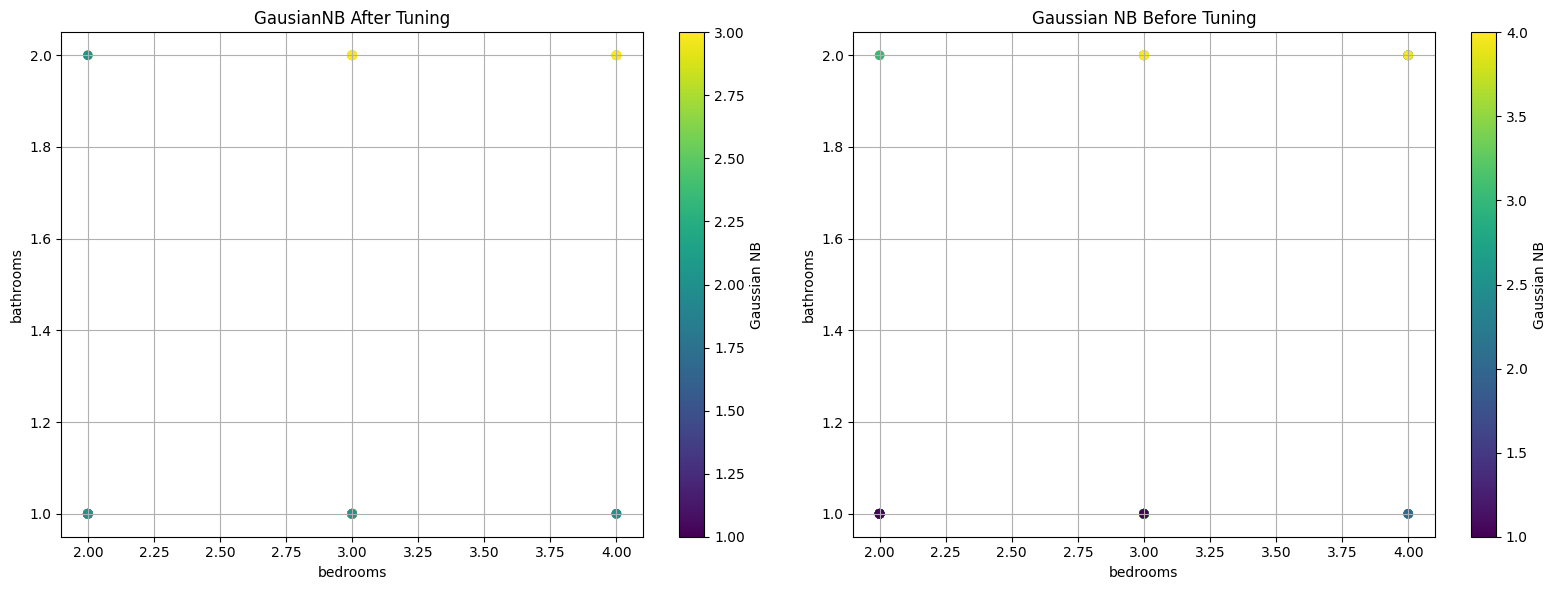

In [2556]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(combined_data['bedrooms'], combined_data['bathrooms'], c=combined_data["gnb_col_new"], cmap='viridis')
axes[0].set_xlabel('bedrooms')
axes[0].set_ylabel('bathrooms')
axes[0].set_title('GausianNB After Tuning')
axes[0].grid(True)
fig.colorbar(axes[0].collections[0], ax=axes[0], label='Gaussian NB')

axes[1].scatter(combined_data['bedrooms'], combined_data['bathrooms'], c=combined_data["gnb_prediction"], cmap='viridis')
axes[1].set_xlabel('bedrooms')
axes[1].set_ylabel('bathrooms')
axes[1].set_title('Gaussian NB Before Tuning')
axes[1].grid(True)
fig.colorbar(axes[1].collections[0], ax=axes[1], label='Gaussian NB')

plt.tight_layout()
plt.show()

In [2557]:
hierarchy_clust = hc.fit_predict(x_final_norm)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [2558]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

hierarchy_col_new = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster_new"])

combined_data_assoc_newHC = pd.concat([x_final,kmeans_col, hierarchy_col_new], axis=1)

In [2559]:
comparison_hc_after_tunning = pd.concat([x_final,hierarchy_col, hierarchy_col_new], axis=1)


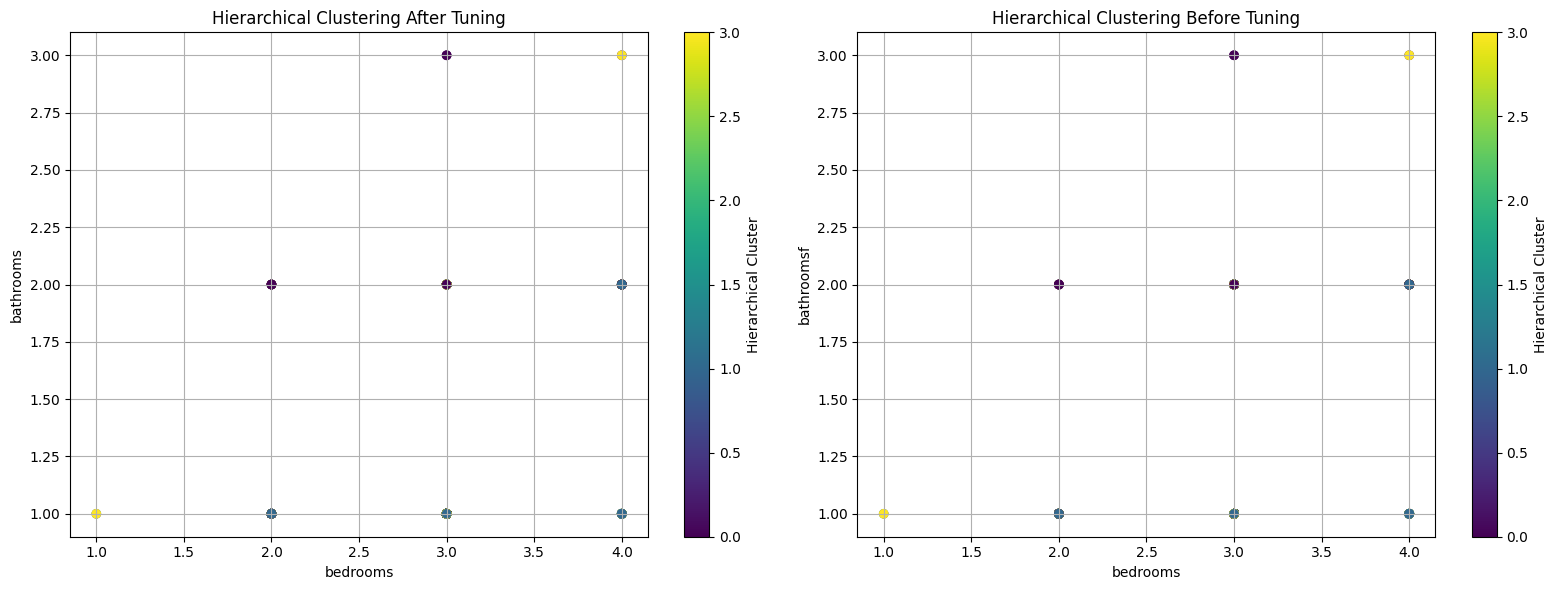

In [2560]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(comparison_hc_after_tunning['bedrooms'], comparison_hc_after_tunning['bathrooms'], c=comparison_hc_after_tunning["hierarchy_cluster_new"], cmap='viridis')
axes[0].set_xlabel('bedrooms')
axes[0].set_ylabel('bathrooms')
axes[0].set_title('Hierarchical Clustering After Tuning')
axes[0].grid(True)
fig.colorbar(axes[0].collections[0], ax=axes[0], label='Hierarchical Cluster')

axes[1].scatter(comparison_hc_after_tunning['bedrooms'], comparison_hc_after_tunning['bathrooms'], c=comparison_hc_after_tunning["hierarchy_cluster"], cmap='viridis')
axes[1].set_xlabel('bedrooms')
axes[1].set_ylabel('bathroomsf')
axes[1].set_title('Hierarchical Clustering Before Tuning')
axes[1].grid(True)
fig.colorbar(axes[1].collections[0], ax=axes[1], label='Hierarchical Cluster')

plt.tight_layout()
plt.show()

melakukan pemodelan ulang khusus untuk metode Hierarchical Clustering karena setelah menyetel hyperparameter, dan tidak mendapatkan kombinasi hyperparameter yang memberikan skor yang lebih baik daripada pemodelan sebelumnya. Penyesuaian yang dilakukan pada data menggunakan metode Hierarchical Clustering menghasilkan korelasi antara bedrooms, dan bathrooms. Hal ini menunjukkan bahwa penyesuaian tersebut berhasil meningkatkan kualitas data dan membuatnya lebih sesuai untuk analisis statistik.

#Kesimpulan

Berdasarkan hasil evaluasi, terlihat bahwa model Decision Tree memiliki nilai akurasi, presisi, recall, dan F1-score yang cukup tinggi dibandingkan dengan model lainnya. Nilai-nilai ini menunjukkan bahwa model Decision Tree mampu melakukan klasifikasi dengan baik secara keseluruhan, dengan tingkat ketepatan dan kemampuan mengklasifikasikan kelas positif yang lebih baik daripada model lainnya.

Selain itu, pada model lain, ketika dilakukan tuning hyperparameter, juga ada yang mendapatkan hasil secara signifikan, namun beberapa juga tidak mendapatkan peningkatan hasil yang setinggi model decision tree.

Dengan demikian, dapat saya disimpulkan bahwa model Decision Tree memiliki performa yang paling baik dibandingkan dengan model lain dalam dataset yang digunakan.







